In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

/Users/JordanVani/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('Data/master_updated.csv', index_col='District')
df.drop('Unnamed: 0', axis=1, inplace=True)

X = df.iloc[:, range(42)]
Y = df.iloc[:, range(42, 64)]

In [3]:
model = BayesianRidge(compute_score=True)
for i in range(22):
    model.fit(X, Y[[i]])
#     print str(i) + ': ', str(model.score(X, Y[[i]]))

/Users/JordanVani/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
Y[[5, 7, 9]].columns

Index([u'Chicken pox', u'Hepatatis-B', u'Mumps'], dtype='object')

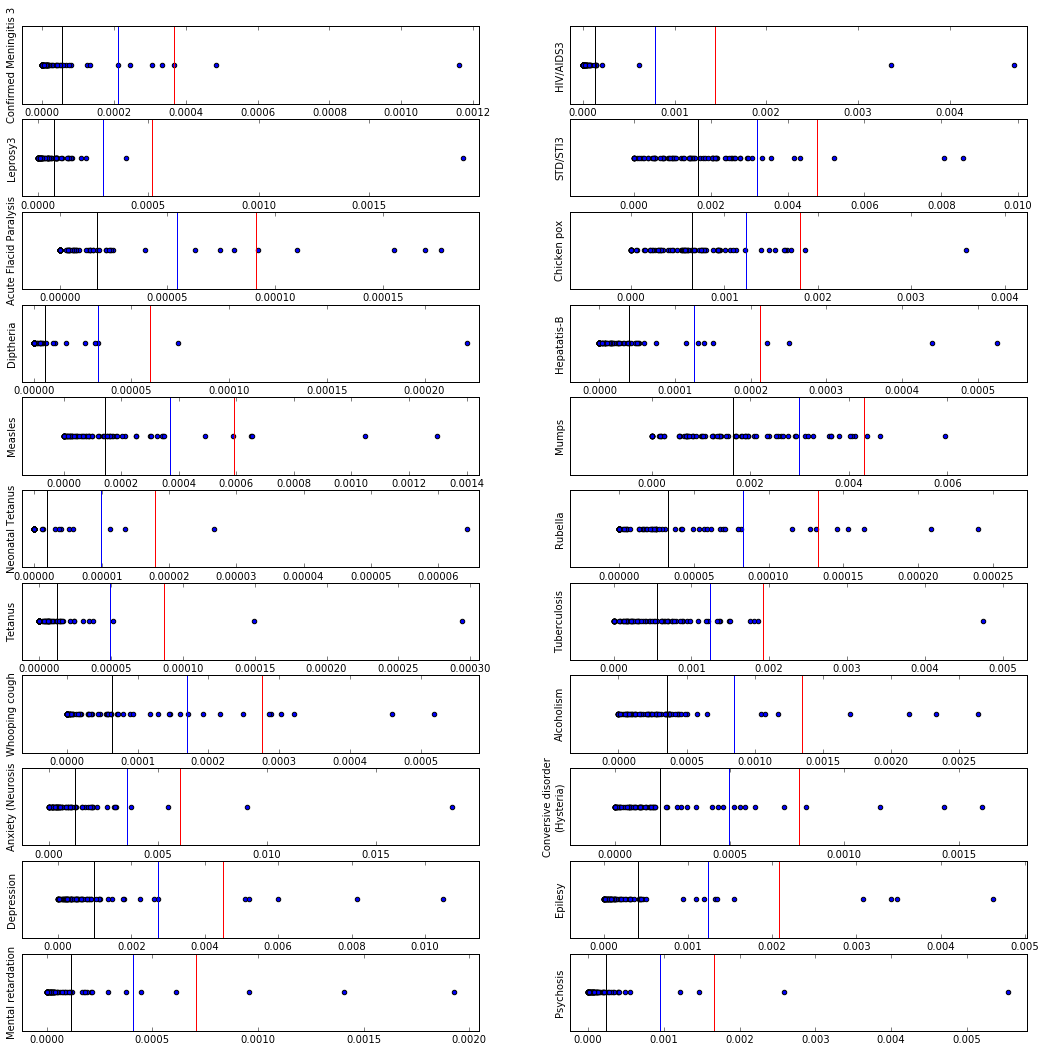

In [5]:
# Plot by groups
fig, ([ax1, ax2], [ax3, ax4],
      [ax5, ax6], [ax7, ax8],
      [ax9, ax10], [ax11, ax12],
      [ax13, ax14], [ax15, ax16],
      [ax17, ax18], [ax19, ax20],
      [ax21, ax22],) = pl.subplots(nrows = 11, ncols = 2, figsize = (18, 18))

for i in enumerate(fig.axes):
    i[1].axes.get_yaxis().set_ticks([])
    i[1].axvline(x=np.array(Y[[i[0]]]).mean(), ymin=-1, ymax=1, c='k')
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std(), ymin=-1, ymax=1, c='b')
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std()*2, ymin=-1, ymax=1, c='r')
    i[1].scatter(Y[[i[0]]], np.zeros(Y[[i[0]]].shape))
    i[1].set_xlim(np.array(Y[[i[0]]]).min() - np.array(Y[[i[0]]]).mean(),
                 np.array(Y[[i[0]]]).max() + np.array(Y[[i[0]]]).mean())
    i[1].set_ylabel(Y[[i[0]]].columns[0], fontsize = 10)

In [21]:
knn = KNeighborsRegressor(5)
y = pd.DataFrame(knn.fit(X, Y).predict(X), columns=map(lambda x: x + ' Pred', Y.columns))
df_nn = Y.reset_index().join(y).set_index('District')

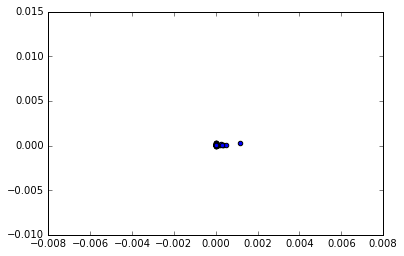

In [25]:
pl.scatter(df_nn['Confirmed Meningitis 3'], df_nn['Confirmed Meningitis 3 Pred'])
